[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/jotabruno/CLIMATE_CHANGE_CMIP6/blob/main/1GCM_CMIP6_VARIABLES_SUPERFICIE.ipynb
)


In [4]:
# Librerias requeridas para instalar, usamos pip 
#!pip install intake intake-esm
#!pip install xmip
#!pip install matplotlib
#!pip install aiohttp requests
#!pip install Cartopy

In [5]:
import intake
import matplotlib.pyplot as plt
import xmip
from xmip.preprocessing import combined_preprocessing
import gcsfs
import numpy as np
import random
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

In [7]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat = intake.open_esm_datastore(cat_url)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207


In [8]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat2 = cat.search(
    variable_id = 'tas',        # temperatura superficial 
    table_id = 'Amon',          # datos mensuales del océano
    experiment_id = 'historical',  # simulación histórica
    #source_id = ['ACCESS-CM2','MPI-ESM1-2-HR','NorESM2-MM','ECMWF-IFS-LR'],      # modelo
    source_id =[      'CMCC-CM2-HR4',      'EC-Earth3P-HR',    'HadGEM3-GC31-MM',
    'HadGEM3-GC31-HM',    'HadGEM3-GC31-LM',         'EC-Earth3P',
       'ECMWF-IFS-HR',       'ECMWF-IFS-LR',    'HadGEM3-GC31-LL',
      'CMCC-CM2-VHR4',           'GFDL-CM4',           'GFDL-AM4',
       'IPSL-CM6A-LR',           'E3SM-1-0',         'CNRM-CM6-1',
          'GFDL-ESM4',         'GFDL-ESM2M',       'GFDL-CM4C192',
        'GFDL-OM4p5B',        'GISS-E2-1-G',        'GISS-E2-1-H',
        'CNRM-ESM2-1',        'BCC-CSM2-MR',           'BCC-ESM1',
             'MIROC6',      'AWI-CM-1-1-MR',       'EC-Earth3-LR',
   'IPSL-CM6A-ATM-HR',              'CESM2',        'CESM2-WACCM',
      'CNRM-CM6-1-HR',         'MRI-ESM2-0',        'SAM0-UNICON',
     'GISS-E2-1-G-CC',        'UKESM1-0-LL',          'EC-Earth3',
      'EC-Earth3-Veg',        'FGOALS-f3-L',            'CanESM5',
      'CanESM5-CanOE',          'INM-CM4-8',          'INM-CM5-0',
              'NESM3',    'MPI-ESM-1-2-HAM',        'CAMS-CSM1-0',
      'MPI-ESM1-2-LR',      'MPI-ESM1-2-HR',      'MRI-AGCM3-2-H',
      'MRI-AGCM3-2-S',         'MCM-UA-1-0',          'INM-CM5-H',
         'KACE-1-0-G',         'NorESM2-LM',        'FGOALS-f3-H',
          'FGOALS-g3',         'MIROC-ES2L',        'FIO-ESM-2-0',
            'NorCPM1',          'NorESM1-F',      'MPI-ESM1-2-XR',
 'CESM1-1-CAM5-CMIP5',           'E3SM-1-1',          'KIOST-ESM',
         'ACCESS-CM2',         'NorESM2-MM',      'ACCESS-ESM1-5',
           'IITM-ESM',        'GISS-E2-2-G',          'CESM2-FV2',
        'GISS-E2-2-H',    'CESM2-WACCM-FV2',              'CIESM',
       'E3SM-1-1-ECA',            'TaiESM1',     'AWI-ESM-1-1-LR',
   'EC-Earth3-Veg-LR',          'CMCC-ESM2',       'CMCC-CM2-SR5',
  'EC-Earth3-AerChem',  'IPSL-CM6A-LR-INCA',    'IPSL-CM5A2-INCA',
        'BCC-CSM2-HR',     'EC-Earth3P-VHR',     'CESM1-WACCM-SC',
         'CAS-ESM2-0',       'EC-Earth3-CC',         'MIROC-ES2H',
        'ICON-ESM-LR'],
    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,<NA>,20180827
1,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,<NA>,20181126
2,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,<NA>,20181212
3,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,<NA>,20181214
4,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,<NA>,20190222
5,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,<NA>,20190227
6,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,<NA>,20190308
7,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,<NA>,20190323
8,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,<NA>,20190403
9,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,<NA>,20190429


In [9]:
# 2. Abrir todos los modelos (36)
# ==============================
ds_dict_full = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [10]:
for key, ds in ds_dict_full.items():
    print("="*80)
    print(key)
    print("source_id:", ds.attrs.get("source_id"))
    print("dims:", ds.dims)
    print("coords:", list(ds.coords))
    print("tas dims:", ds["tas"].dims)
    print("tas shape:", ds["tas"].shape)


CMIP.NCC.NorESM2-LM.historical.Amon.gn
source_id: NorESM2-LM
dims: FrozenMappingWarningOnValuesAccess({'lat': 96, 'bnds': 2, 'lon': 144, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 96, 144)
CMIP.CAS.CAS-ESM2-0.historical.Amon.gn
source_id: CAS-ESM2-0
dims: FrozenMappingWarningOnValuesAccess({'lat': 128, 'bnds': 2, 'lon': 256, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 128, 256)
CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn
source_id: CMCC-CM2-HR4
dims: FrozenMappingWarningOnValuesAccess({'lat': 192, 'bnds': 2, 'lon': 288, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['hei

## PLOT SUDAMERICA ##


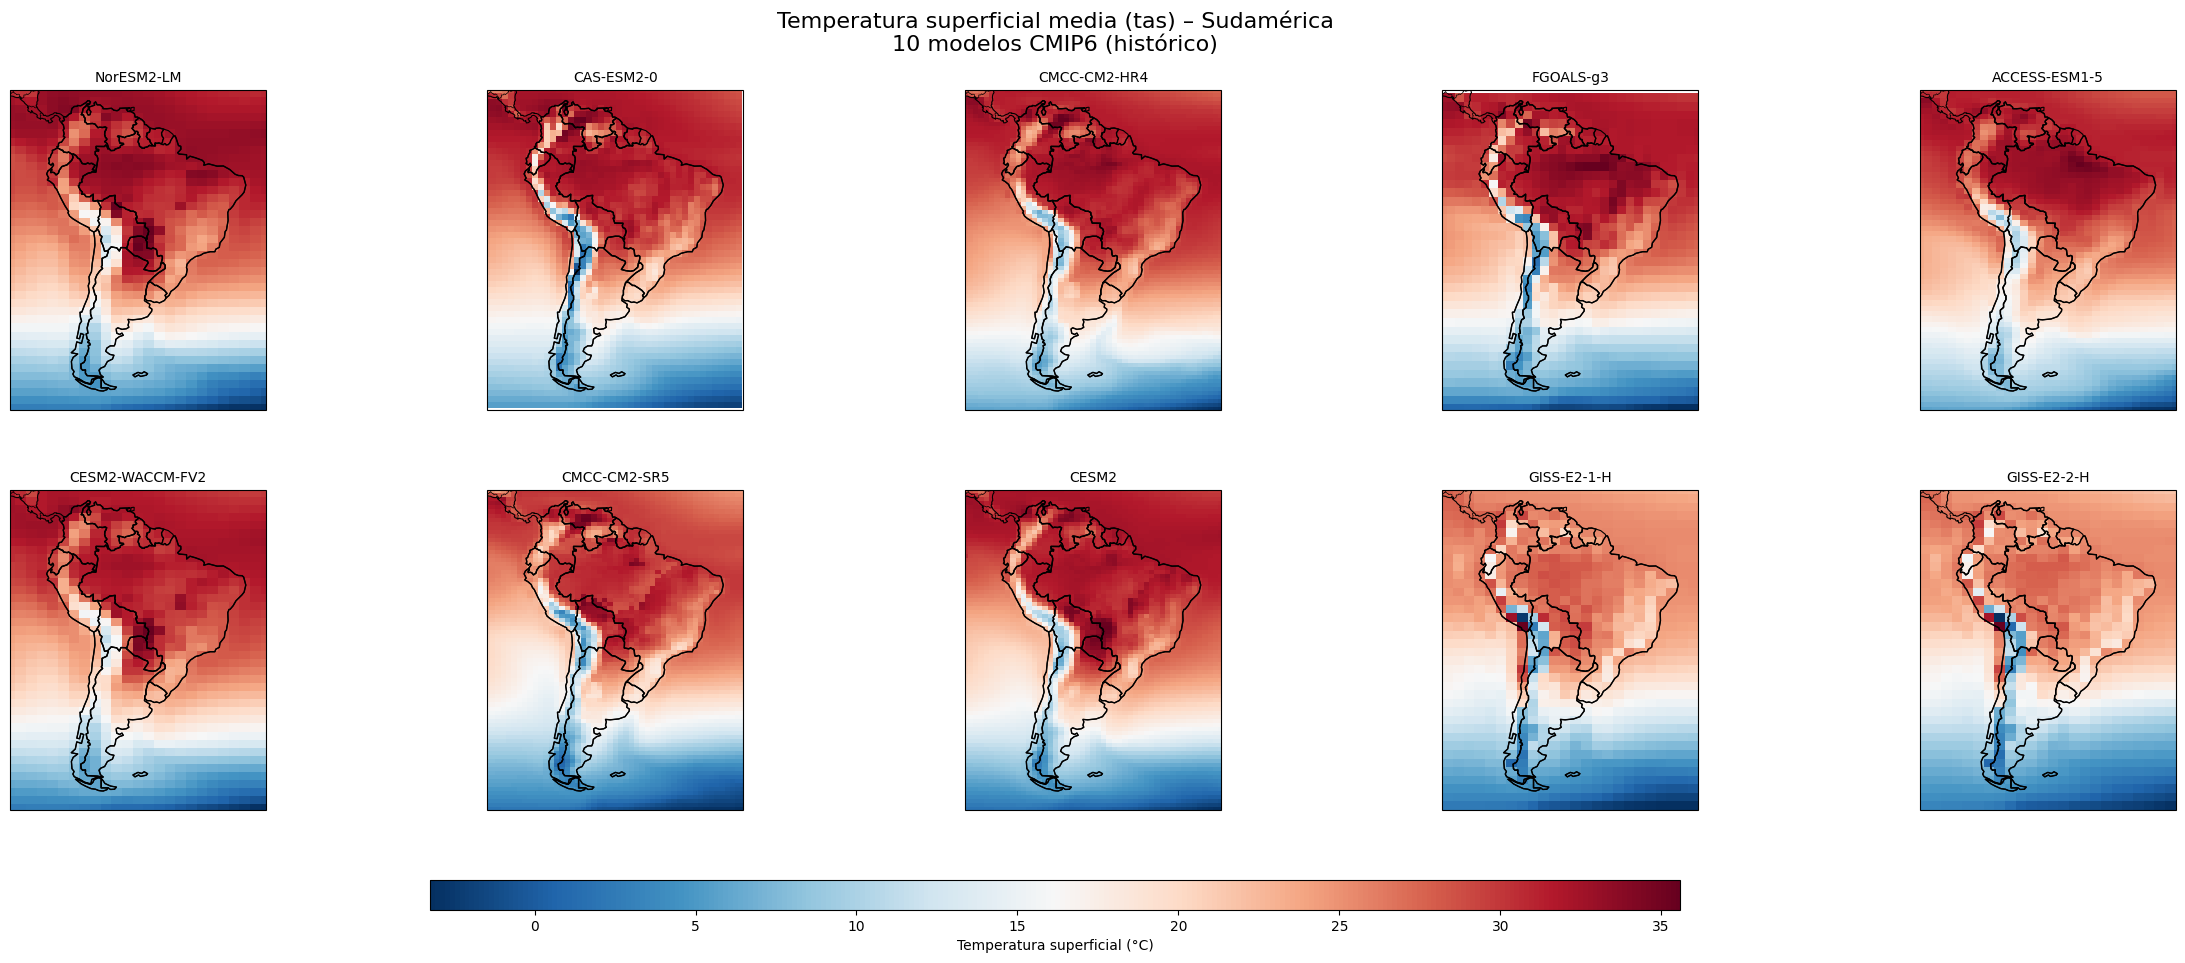

In [13]:
# 3. Dominio Sudamérica
# ==============================
lon_min, lon_max = -90, -30
lat_min, lat_max = -60, 15

# ==============================
# 6. Figura fija 2 × 5 (CON PROYECCIÓN)
# ==============================
proj = ccrs.PlateCarree()
fig, axes = plt.subplots(
    2, 5, figsize=(25, 10),
    subplot_kw={"projection": proj}
)
axes = axes.flatten()

# ==============================
# Contorno SOLO Sudamérica (Natural Earth, sin shapefile manual)
# ==============================
sa_shp = shapereader.natural_earth(
    resolution="110m",
    category="cultural",
    name="admin_0_countries"
)
sa_records = shapereader.Reader(sa_shp).records()
sa_geoms = [r.geometry for r in sa_records if r.attributes.get("CONTINENT") == "South America"]

im = None

# ==============================
# 7. Loop de mapas
# ==============================
for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze().mean(dim="time", skipna=True) - 273.15

    # convertir longitudes 0–360 → −180–180 si aplica
    if tas.lon.max() > 180:
        tas = tas.assign_coords(
            lon=((tas.lon + 180) % 360) - 180
        ).sortby("lon")

    tas_sa = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    # mapa
    im = ax.pcolormesh(
        tas_sa.lon, tas_sa.lat, tas_sa,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    # EXTENT correcto en cartopy
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

    # contornos (elige lo que quieras):
    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    # SOLO borde de Sudamérica (países del continente)
    ax.add_geometries(sa_geoms, crs=proj, facecolor="none", edgecolor="black", linewidth=1.0)

    ax.set_title(src, fontsize=10)

# ==============================
# 8. Layout
# ==============================
fig.subplots_adjust(
    left=0.05, right=0.98, top=0.90, bottom=0.18,
    wspace=0.15, hspace=0.25
)

# ==============================
# 9. Barra de colores inferior
# ==============================
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# ==============================
# 10. Título
# ==============================
fig.suptitle(
    "Temperatura superficial media (tas) – Sudamérica\n10 modelos CMIP6 (histórico)",
    fontsize=16
)

out = "tas_Sudamerica_10modelos_CMIP6.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


## PLOT PAISES ##

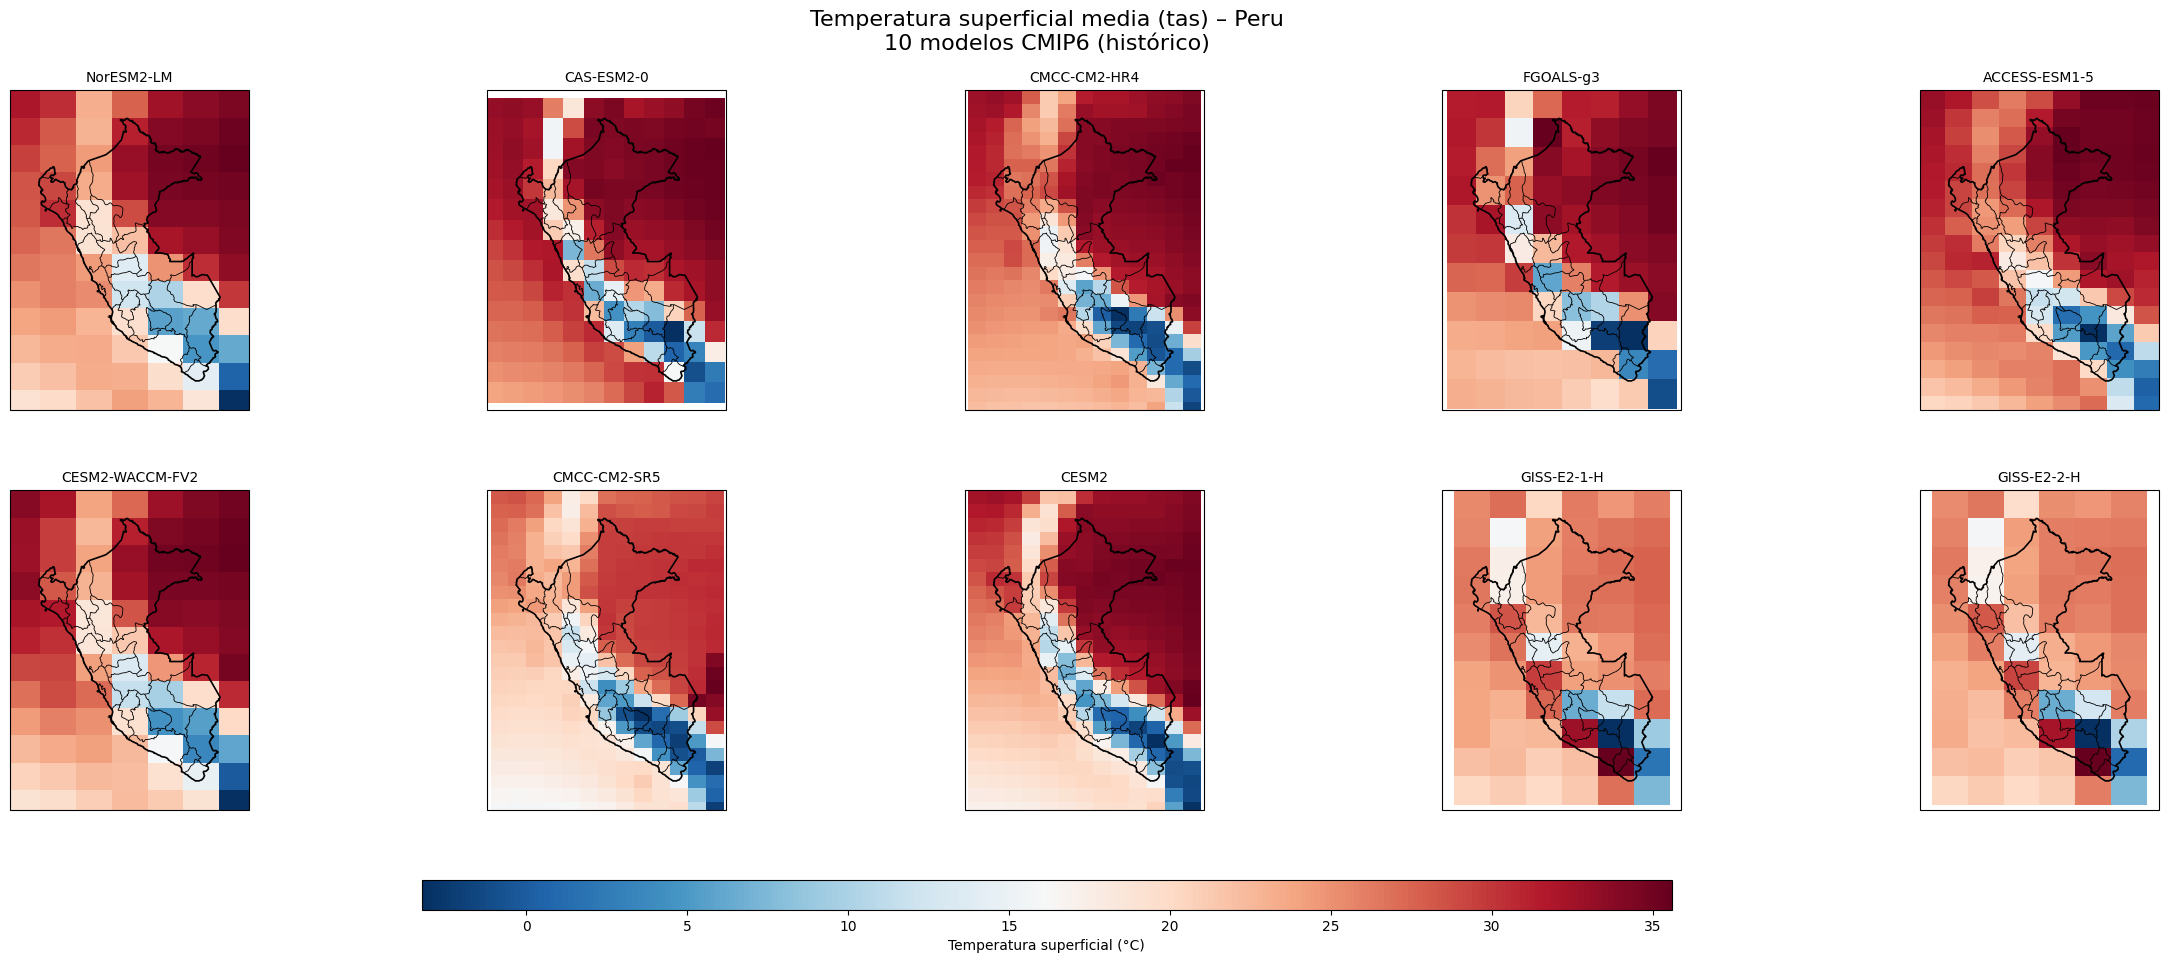

In [19]:
# ==============================
# PLOT (Perú) con contorno país + líneas admin_1 (departamentos/provincias) y guardado
# Requiere: cartopy
# pip install cartopy
# ==============================

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# ==============================
# Ajusta aquí
# ==============================
country = "Peru"      # "Chile", "Argentina", etc.
pad_deg = 2.0         # margen alrededor del país
dpi_out = 300
out_png = "tas_10modelos_%s_contornos.png"%country

proj = ccrs.PlateCarree()

# extent + geometría del país (para centrar automáticamente)
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

# admin_1 (líneas internas). En Natural Earth no siempre coincide 1:1 con “departamentos” oficiales.
adm1_shp = shapereader.natural_earth(
    resolution="10m", category="cultural", name="admin_1_states_provinces_lines"
)
adm1_geoms = []
for r in shapereader.Reader(adm1_shp).records():
    a = r.attributes
    if (a.get("adm0_name") == country) or (a.get("ADM0_NAME") == country) or \
       (a.get("adm0_a3") == "PER") or (a.get("ADM0_A3") == "PER"):
        adm1_geoms.append(r.geometry)

# ==============================
# Figura 2 × 5
# (ds_dict debe existir: dict con 10 datasets ya seleccionados)
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None

for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze().mean(dim="time", skipna=True) - 273.15

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte según país (extent automático)
    tas_pe = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    im = ax.pcolormesh(
        tas_pe.lon, tas_pe.lat, tas_pe,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    ax.set_extent(extent, crs=proj)

    # contorno país
    ax.add_geometries(
        country_geoms, crs=proj,
        facecolor="none", edgecolor="black",
        linewidth=1.2, zorder=3
    )

    # líneas internas admin_1
    if adm1_geoms:
        ax.add_geometries(
            adm1_geoms, crs=proj,
            facecolor="none", edgecolor="black",
            linewidth=0.6, zorder=3
        )

    ax.set_title(src, fontsize=10)

# Layout
fig.subplots_adjust(
    left=0.05, right=0.98, top=0.90, bottom=0.18,
    wspace=0.15, hspace=0.25
)

# Colorbar inferior
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# Título general
fig.suptitle(
    f"Temperatura superficial media (tas) – {country}\n10 modelos CMIP6 (histórico)",
    fontsize=16
)

# Guardar
fig.savefig(out_png, dpi=dpi_out, bbox_inches="tight", facecolor="white")

plt.show()



In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

# ==============================
# 0) Dominio (ajusta si quieres)
# ==============================
lon_min, lon_max = -82, -68
lat_min, lat_max = -19, 1

# ==============================
# 1) Filtrar modelos ploteables (desde ds_dict_full)
# ==============================
valid_items = []

for key, ds in ds_dict_full.items():

    if "tas" not in ds:
        continue

    tas = ds["tas"]

    if not {"lat", "lon"}.issubset(tas.dims):
        continue

    # promedio estacional (climatología por season)
    tas0 = tas.squeeze()

    # lon 0–360 -> -180–180
    if tas0.lon.max() > 180:
        tas0 = tas0.assign_coords(lon=((tas0.lon + 180) % 360) - 180).sortby("lon")

    # recorte
    tas0 = tas0.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    if tas0.lon.size == 0 or tas0.lat.size == 0:
        continue

    # asegurar que existen seasons
    try:
        _ = tas0.groupby("time.season").mean("time", skipna=True)
    except Exception:
        continue

    valid_items.append((key, ds))

print(f"Modelos válidos en el dominio: {len(valid_items)}")


Modelos válidos en el dominio: 34


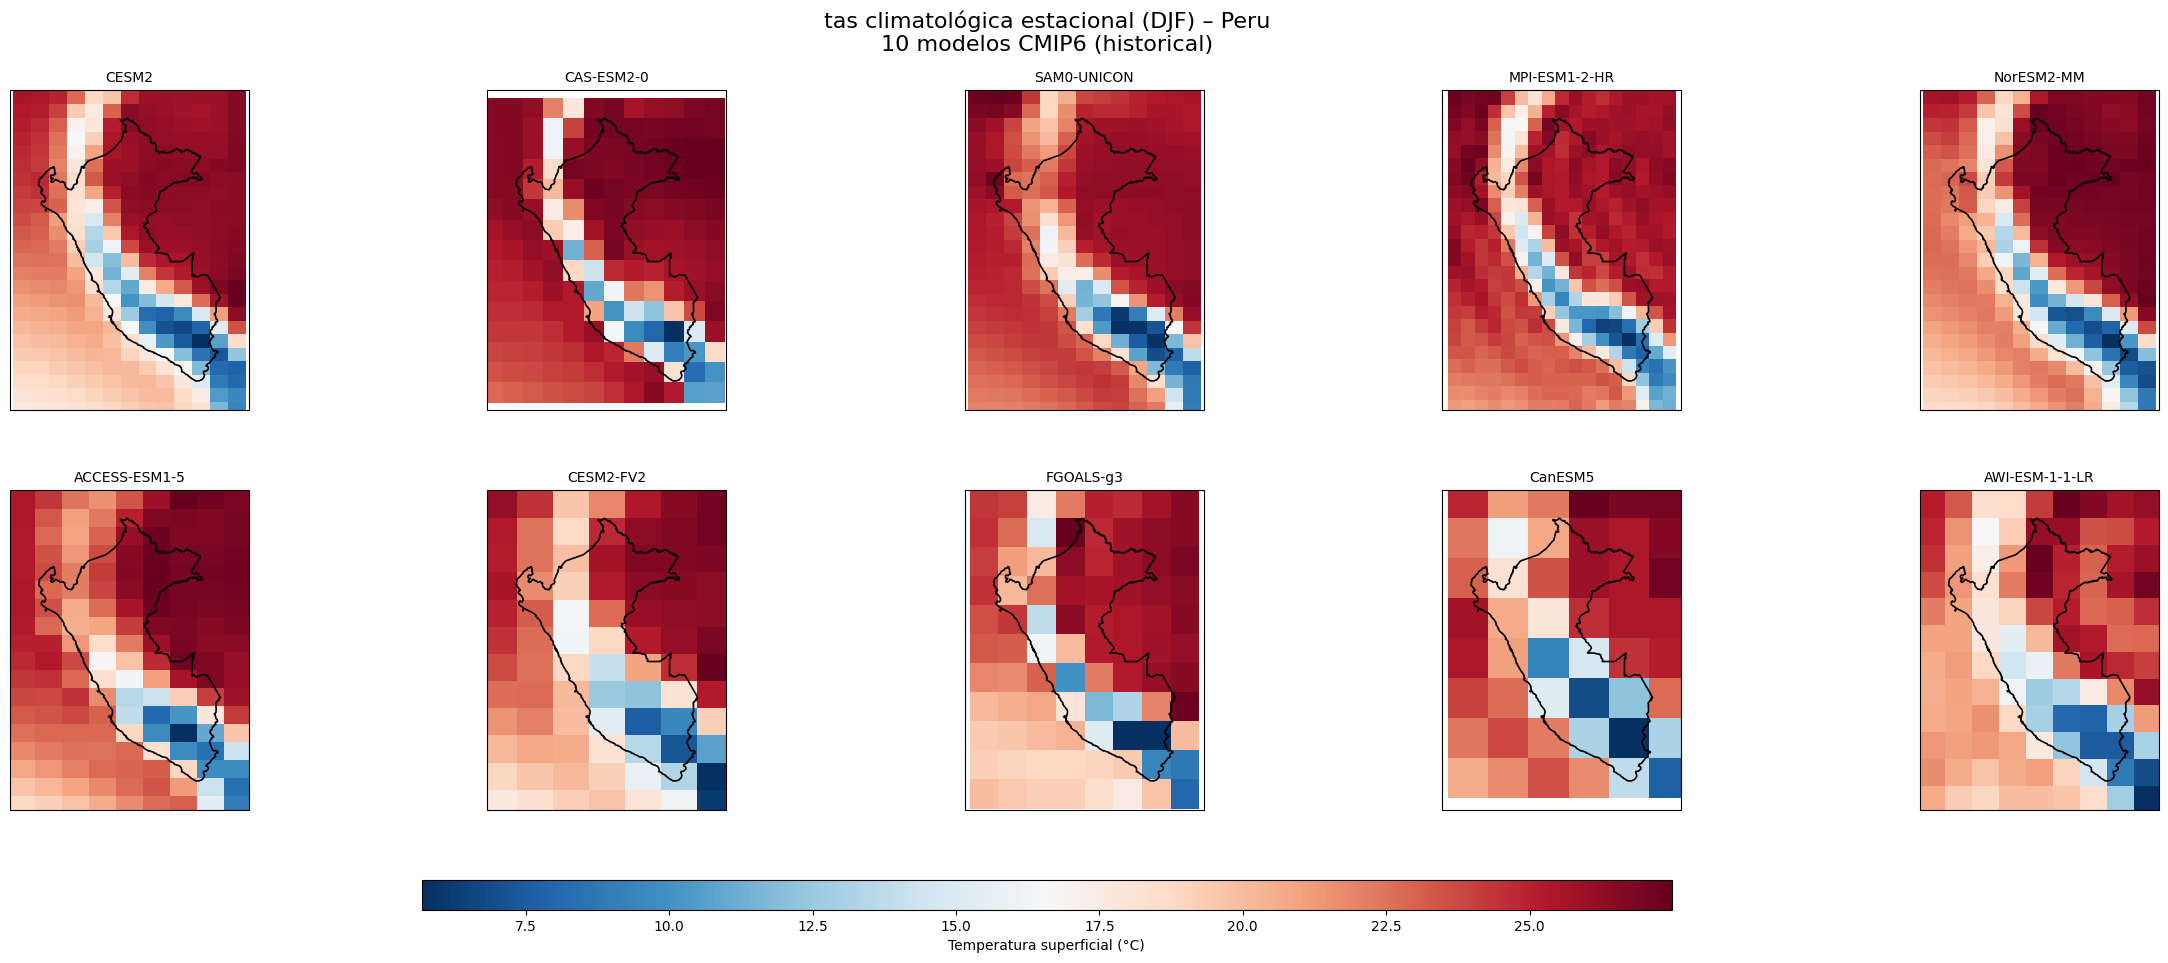

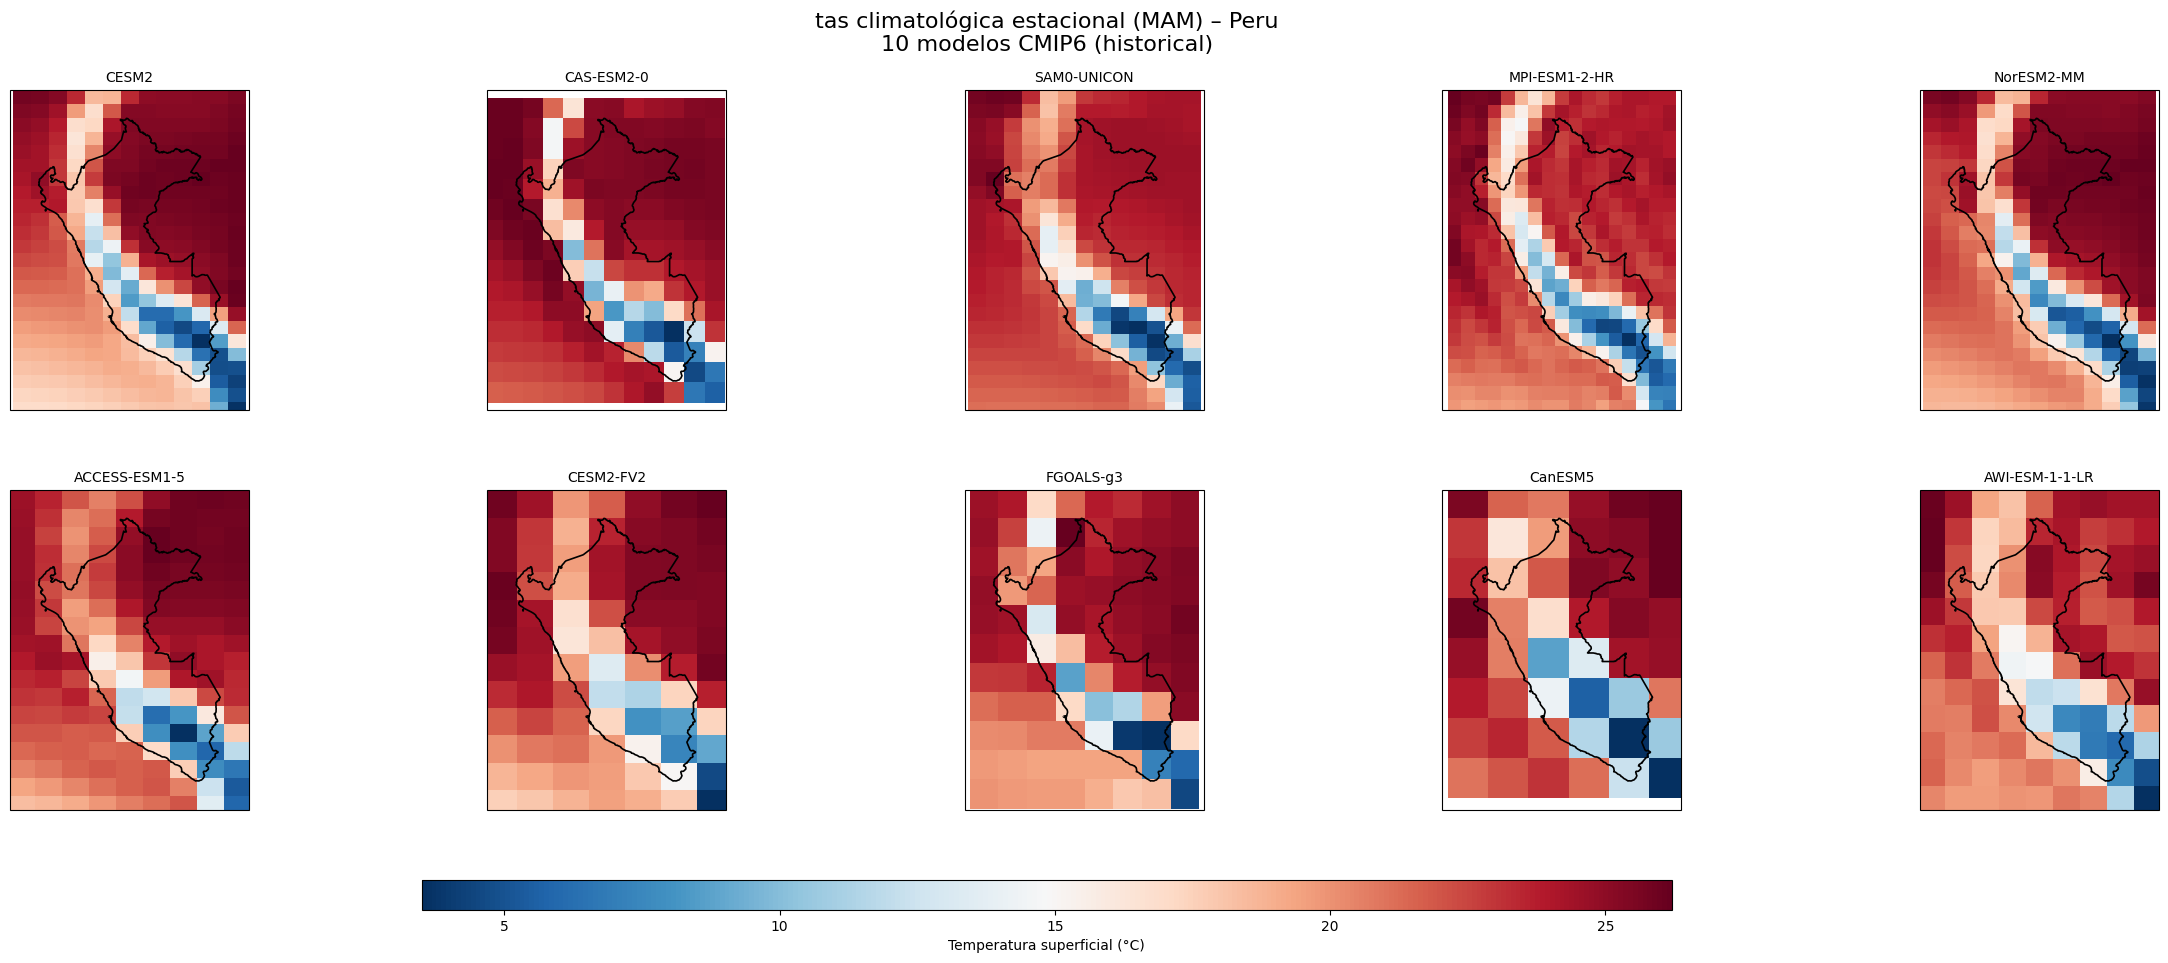

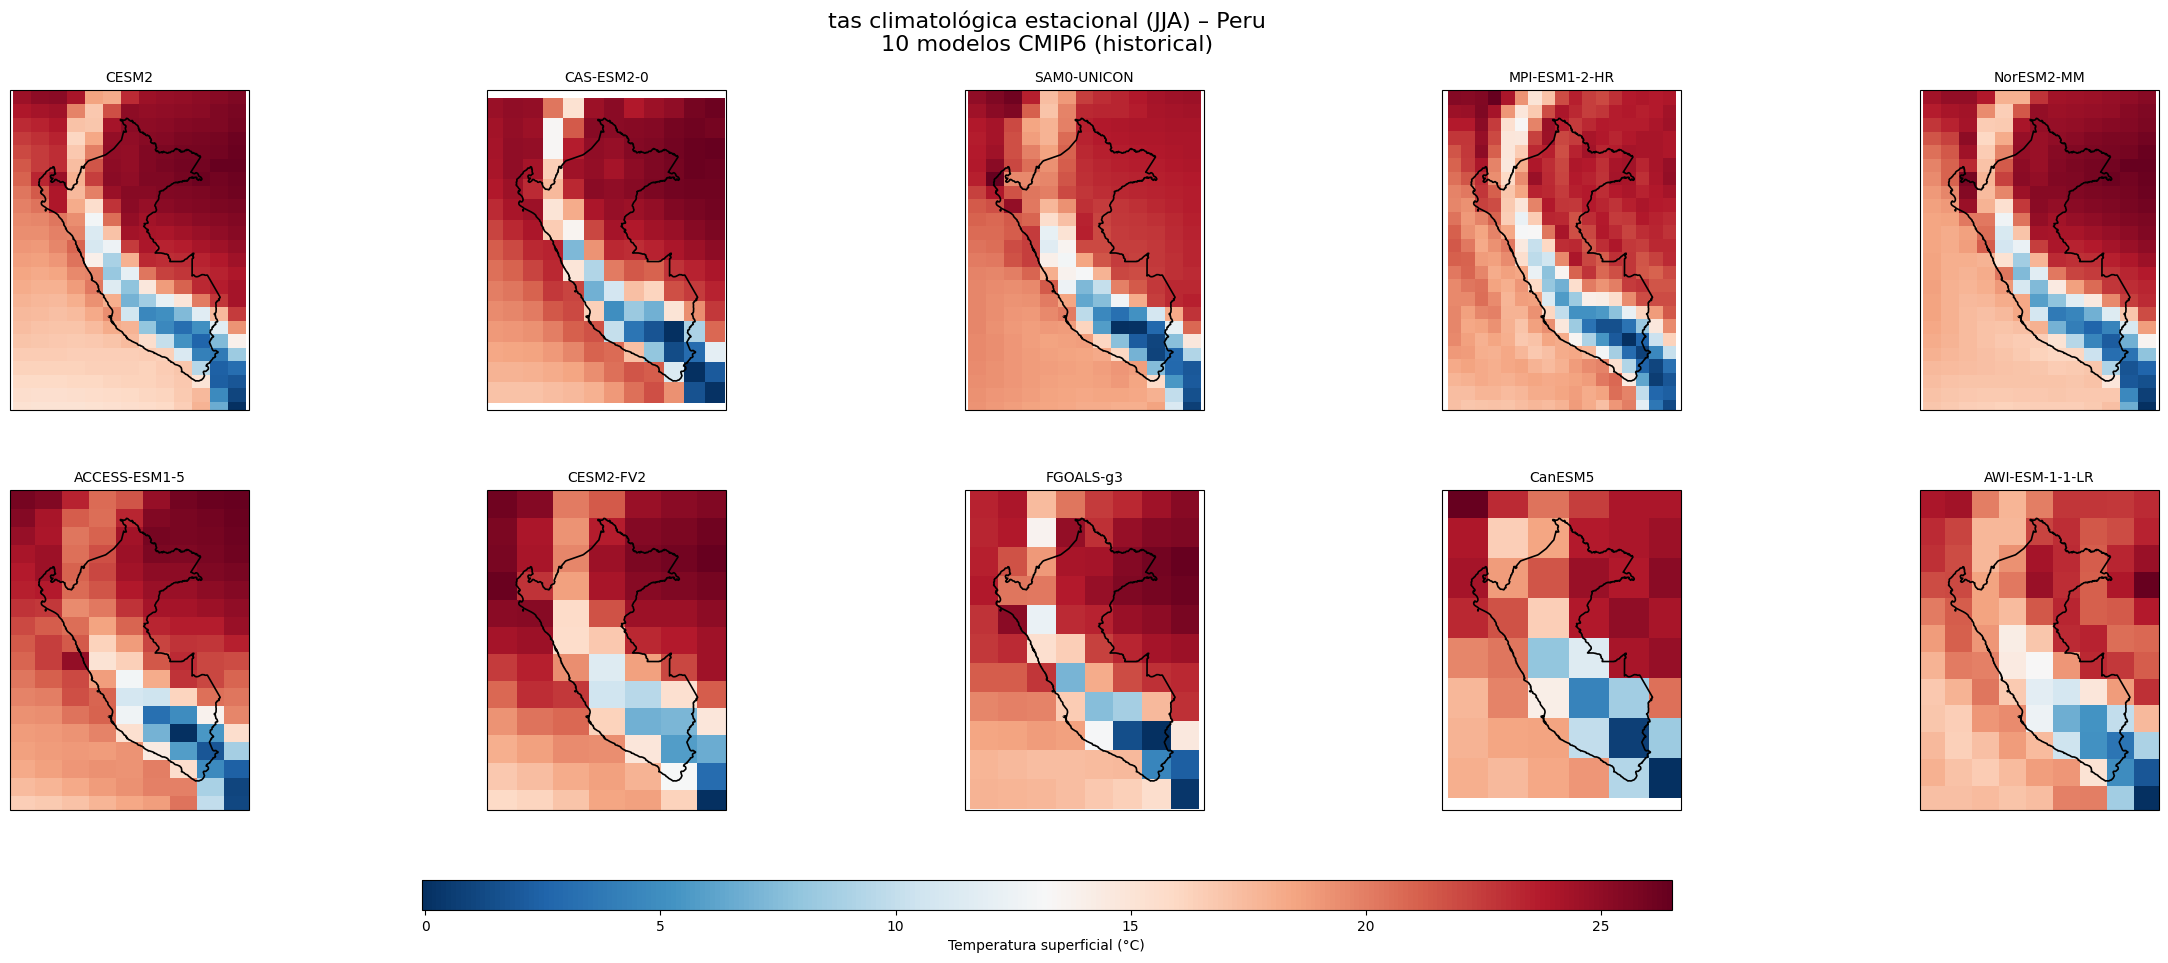

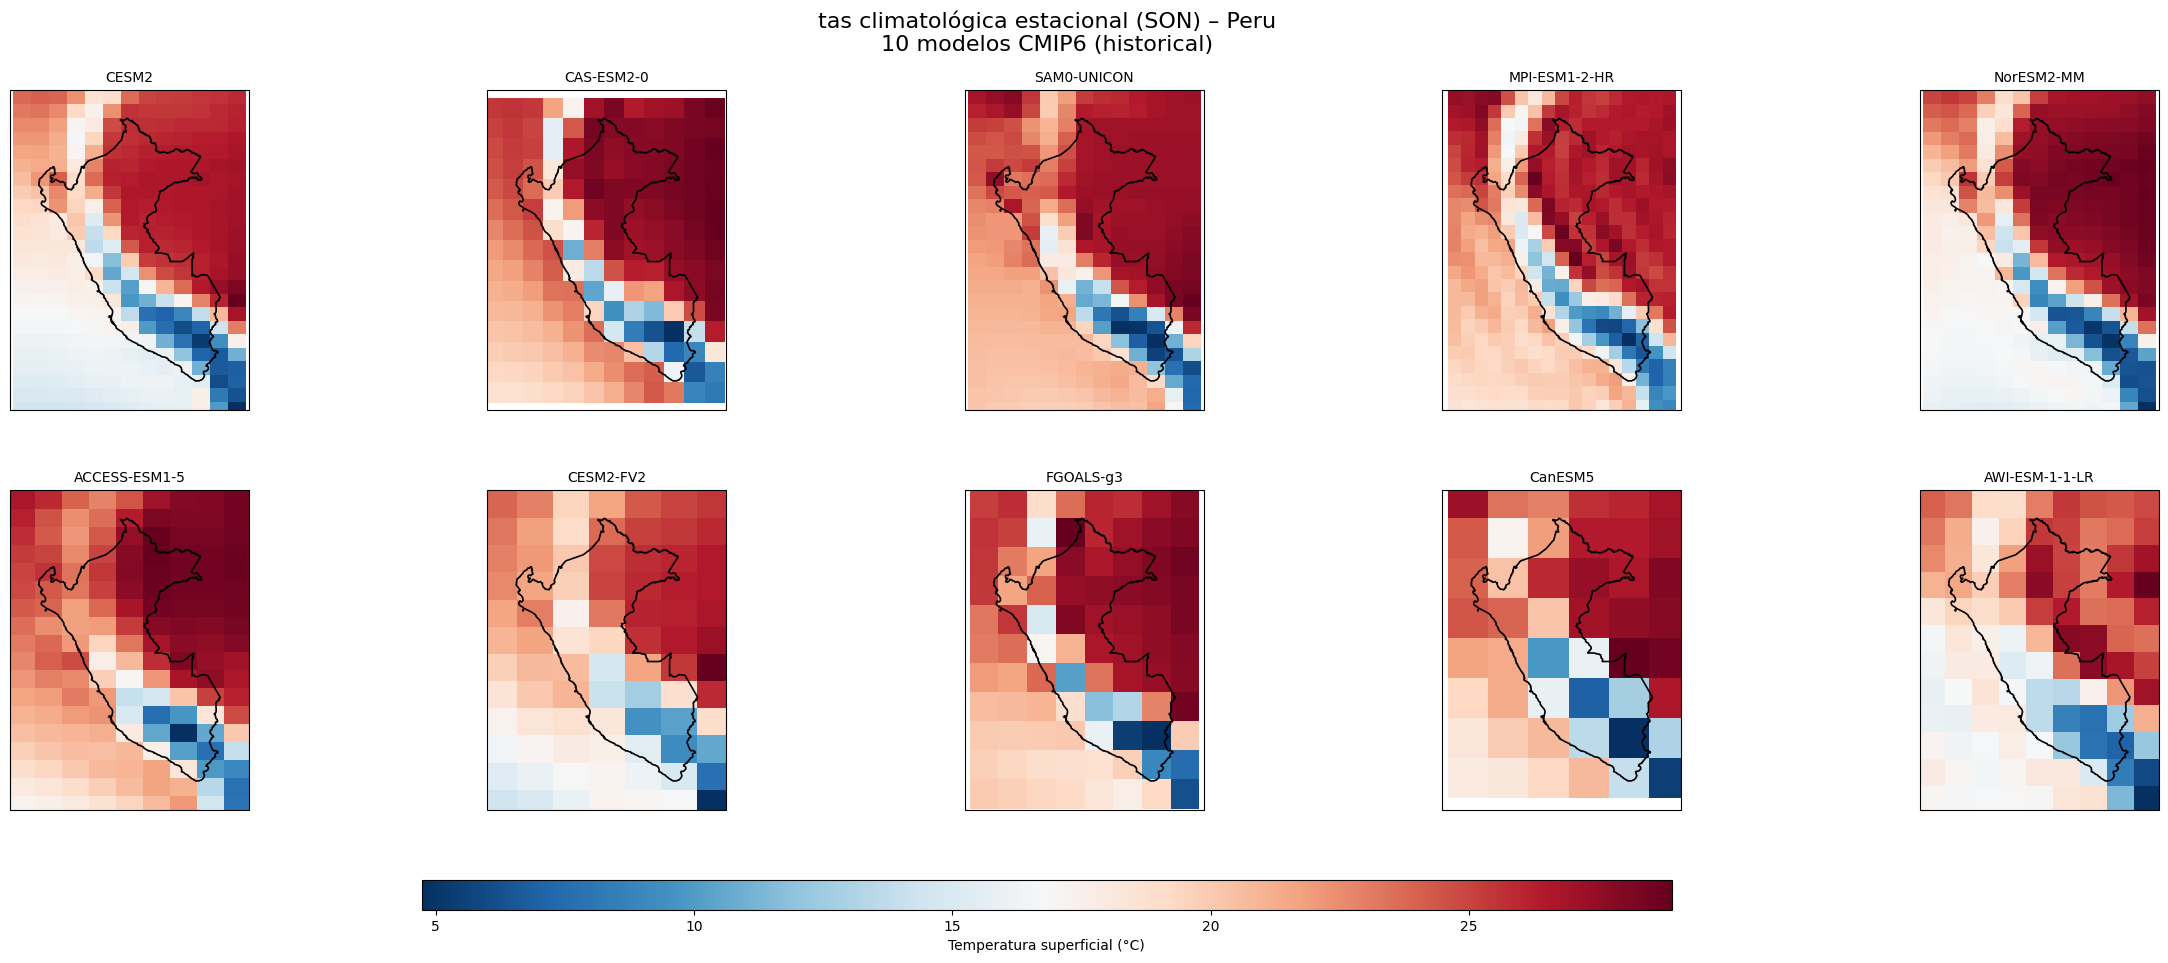

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
import random

# ==============================
# 0) País objetivo (cámbialo)
# ==============================
country = "Peru"   # "Chile", "Argentina", etc.
pad_deg = 2.0      # margen alrededor del país
proj = ccrs.PlateCarree()

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# extent automático para centrar en el país
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

# ==============================
# 2) Seleccionar EXACTAMENTE 10
# (asume que valid_items ya existe)
# ==============================
random.seed(42)
selected_items = random.sample(valid_items, 10)
ds_dict = dict(selected_items)

# ==============================
# 3) Función: mapa estacional
# ==============================
def seasonal_map(ds, season, lon_min, lon_max, lat_min, lat_max):
    tas = ds["tas"].squeeze()

    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    tas_seas = tas.groupby("time.season").mean("time", skipna=True).sel(season=season)

    return tas_seas - 273.15

# ==============================
# 4) Plot: una figura por estación (4 figuras) CON CONTORNO DEL PAÍS
# ==============================
seasons = ["DJF", "MAM", "JJA", "SON"]

for season in seasons:

    fig, axes = plt.subplots(
        2, 5, figsize=(25, 10),
        subplot_kw={"projection": proj}
    )
    axes = axes.flatten()

    im = None

    for ax, (key, ds) in zip(axes, ds_dict.items()):

        src = ds.attrs.get("source_id", "unknown")
        tas_seas = seasonal_map(ds, season, lon_min, lon_max, lat_min, lat_max)

        im = ax.pcolormesh(
            tas_seas["lon"], tas_seas["lat"], tas_seas,
            cmap="RdBu_r", shading="auto",
            transform=proj
        )

        # centrar al país automáticamente
        ax.set_extent(extent, crs=proj)

        # contorno del país
        ax.add_geometries(
            country_geoms, crs=proj,
            facecolor="none", edgecolor="black",
            linewidth=1.2, zorder=3
        )

        ax.set_title(src, fontsize=10)

    # Layout
    fig.subplots_adjust(
        left=0.05, right=0.98, top=0.90, bottom=0.18,
        wspace=0.15, hspace=0.25
    )

    # Colorbar inferior
    cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label("Temperatura superficial (°C)")

    fig.suptitle(
        f"tas climatológica estacional ({season}) – {country}\n10 modelos CMIP6 (historical)",
        fontsize=16
    )

    # Guardar
    out = f"tas_{season}_{country}_10modelos.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

    plt.show()
